In this dataset we will be predicting the Total claim amount of the user who have insured their vehicle in the country US, so for the prdiction we will be using linear regression model to predict the claim amount.

In [1]:
#importing all the libraries and loading the csv file

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv('auto.csv',parse_dates=[8],names=range(0,26),header=0)

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2011-02-24,Employed,...,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,2011-01-31,Unemployed,...,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,US,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2011-02-19,Employed,...,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,US,MO,Missouri,764.586183,No,Basic,Bachelor,2011-01-20,Unemployed,...,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,HB64268,US,KS,Kansas,281.369258,No,Basic,Bachelor,2011-02-03,Employed,...,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize


EDA PROCESS

In [6]:
df.dtypes

0             object
1             object
2             object
3             object
4            float64
5             object
6             object
7             object
8     datetime64[ns]
9             object
10            object
11             int64
12            object
13            object
14             int64
15             int64
16             int64
17             int64
18             int64
19            object
20            object
21            object
22            object
23           float64
24            object
25            object
dtype: object

In [7]:
#dropping the 0 column which is user id
df.drop(0,axis=1,inplace=True)

In [8]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25
0,US,KS,Kansas,276.351928,No,Basic,Bachelor,2011-02-24,Employed,F,...,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,US,NE,Nebraska,697.953590,No,Extended,Bachelor,2011-01-31,Unemployed,F,...,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,US,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2011-02-19,Employed,F,...,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,US,MO,Missouri,764.586183,No,Basic,Bachelor,2011-01-20,Unemployed,M,...,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,US,KS,Kansas,281.369258,No,Basic,Bachelor,2011-02-03,Employed,M,...,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize


In [9]:
df.drop(1,axis=1,inplace=True)
df.shape

(1249, 24)

In [10]:
df.head()

,2,3,4,5,6,7,8,9,10,11,...,16,17,18,19,20,21,22,23,24,25
0,KS,Kansas,276.351928,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,NE,Nebraska,697.953590,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,MO,Missouri,764.586183,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,KS,Kansas,281.369258,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize


In [11]:
df.isna().sum()          #no null values is present so far

2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1249 entries, 0 to 1248
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   2       1249 non-null   object        
 1   3       1249 non-null   object        
 2   4       1249 non-null   float64       
 3   5       1249 non-null   object        
 4   6       1249 non-null   object        
 5   7       1249 non-null   object        
 6   8       1249 non-null   datetime64[ns]
 7   9       1249 non-null   object        
 8   10      1249 non-null   object        
 9   11      1249 non-null   int64         
 10  12      1249 non-null   object        
 11  13      1249 non-null   object        
 12  14      1249 non-null   int64         
 13  15      1249 non-null   int64         
 14  16      1249 non-null   int64         
 15  17      1249 non-null   int64         
 16  18      1249 non-null   int64         
 17  19      1249 non-null   object        
 18  20      

In [13]:
#using label encoder we will convert the datatype of object column to int/float

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
a=[2,3,5,6,7,9,10,12,13,19,20,21,22,24,25]

In [16]:
for i in a:
    le=LabelEncoder()
    df[i]=le.fit_transform(df[i].astype(str))

In [17]:
df.head()

,2,3,4,5,6,7,8,9,10,11,...,16,17,18,19,20,21,22,23,24,25
0,1,1,276.351928,0,0,0,2011-02-24,1,0,56274,...,5,0,1,0,2,0,0,384.811147,5,1
1,3,3,697.953590,0,1,0,2011-01-31,4,0,0,...,42,0,8,1,5,3,0,1131.464935,0,1
2,4,4,1288.743165,0,2,0,2011-02-19,1,0,48767,...,38,0,2,1,5,0,0,566.472247,5,1
3,2,2,764.586183,0,0,0,2011-01-20,4,1,0,...,65,0,7,0,1,0,2,529.881344,3,1
4,1,1,281.369258,0,0,0,2011-02-03,1,1,43836,...,44,0,1,1,3,0,0,138.130879,0,1


In [18]:
df.describe()

,2,3,4,5,6,7,9,10,11,12,...,16,17,18,19,20,21,22,23,24,25
count,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,...,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000
mean,1.665332,1.665332,794.860660,0.152122,0.489191,1.526821,1.822258,0.475580,38333.167334,0.927142,...,47.384307,0.393915,2.975981,0.835869,3.839071,1.008006,1.103283,425.122769,1.803843,1.100881
std,1.321697,1.321697,658.522539,0.359283,0.681782,1.383091,1.320008,0.499603,30343.442439,0.594021,...,27.988143,0.889844,2.418094,0.497875,1.642449,1.086750,1.071811,284.197253,2.046523,0.530548
min,0.000000,0.000000,200.435067,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.382107,0.000000,0.000000
25%,0.000000,0.000000,398.226609,0.000000,0.000000,0.000000,1.000000,0.000000,11904.000000,1.000000,...,23.000000,0.000000,1.000000,1.000000,3.000000,0.000000,0.000000,268.471802,0.000000,1.000000
50%,2.000000,2.000000,580.206598,0.000000,0.000000,1.000000,1.000000,0.000000,34990.000000,1.000000,...,47.000000,0.000000,2.000000,1.000000,4.000000,1.000000,1.000000,379.200000,0.000000,1.000000
75%,3.000000,3.000000,892.046400,0.000000,1.000000,3.000000,3.000000,1.000000,63933.000000,1.000000,...,71.000000,0.000000,4.000000,1.000000,5.000000,2.000000,2.000000,542.400000,3.000000,1.000000
max,4.000000,4.000000,5816.655351,1.000000,2.000000,4.000000,4.000000,1.000000,99960.000000,2.000000,...,99.000000,5.000000,9.000000,2.000000,8.000000,3.000000,3.000000,2893.239678,5.000000,2.000000


From the above we can see that how values are deviating from 75% to max value and this deviation usually produces outliers as we can see fromm the above description and scipy library in python provides methods to remove outliers that i have illustrated later in this project.

In [19]:
df.dtypes

2              int32
3              int32
4            float64
5              int32
6              int32
7              int32
8     datetime64[ns]
9              int32
10             int32
11             int64
12             int32
13             int32
14             int64
15             int64
16             int64
17             int64
18             int64
19             int32
20             int32
21             int32
22             int32
23           float64
24             int32
25             int32
dtype: object

In [20]:
#dividing the data set in x and y(target)

In [21]:
x1=df.drop(8,axis=1)

In [22]:
x1.head()

,2,3,4,5,6,7,9,10,11,12,...,16,17,18,19,20,21,22,23,24,25
0,1,1,276.351928,0,0,0,1,0,56274,1,...,5,0,1,0,2,0,0,384.811147,5,1
1,3,3,697.953590,0,1,0,4,0,0,1,...,42,0,8,1,5,3,0,1131.464935,0,1
2,4,4,1288.743165,0,2,0,1,0,48767,1,...,38,0,2,1,5,0,0,566.472247,5,1
3,2,2,764.586183,0,0,0,4,1,0,1,...,65,0,7,0,1,0,2,529.881344,3,1
4,1,1,281.369258,0,0,0,1,1,43836,0,...,44,0,1,1,3,0,0,138.130879,0,1


In [23]:
x=x1.drop(23,axis=1)

In [24]:
x.head()

,2,3,4,5,6,7,9,10,11,12,...,15,16,17,18,19,20,21,22,24,25
0,1,1,276.351928,0,0,0,1,0,56274,1,...,32,5,0,1,0,2,0,0,5,1
1,3,3,697.953590,0,1,0,4,0,0,1,...,13,42,0,8,1,5,3,0,0,1
2,4,4,1288.743165,0,2,0,1,0,48767,1,...,18,38,0,2,1,5,0,0,5,1
3,2,2,764.586183,0,0,0,4,1,0,1,...,18,65,0,7,0,1,0,2,3,1
4,1,1,281.369258,0,0,0,1,1,43836,0,...,12,44,0,1,1,3,0,0,0,1


In [25]:
y=df[23].values
y=y.reshape(-1,1)

In [26]:
y.shape

(1249, 1)

In [27]:
x.shape

(1249, 22)

Data Visualisation

In [28]:
#importing Libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

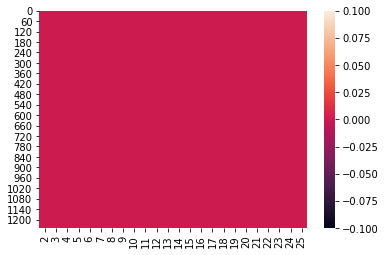

In [29]:
sns.heatmap(df.isna())

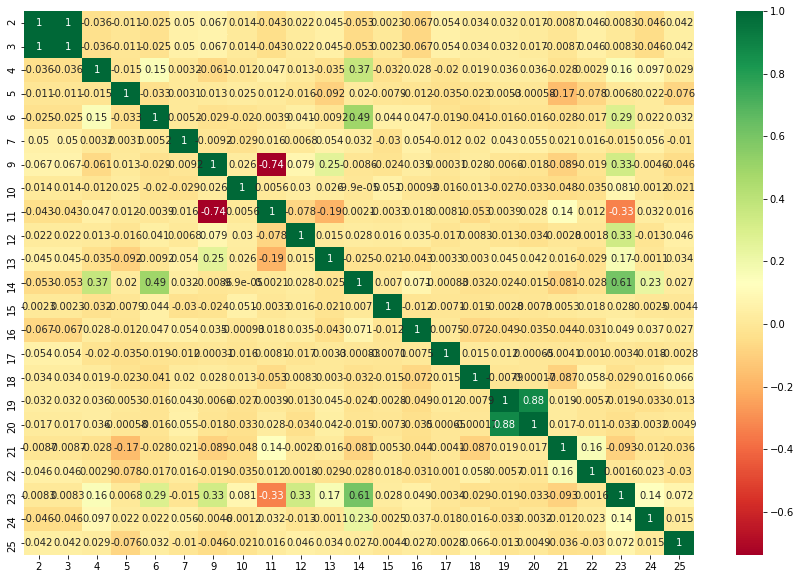

In [30]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')

In [31]:
#from above we can say that most of the values are not correlated among each other i.e there is no correlation between them.

In [32]:
df.skew()      #we can see that the skewness is presenet in some of the columns, hence will try to remove them

2     0.077048
3     0.077048
4     2.616704
5     1.939622
6     1.057147
7     0.357411
9     0.876029
10    0.097912
11    0.261972
12    0.021966
13   -0.086807
14    2.174094
15    0.271902
16    0.053248
17    2.710767
18    1.250810
19   -0.306647
20   -0.348583
21    0.745738
22    0.509332
23    1.736739
24    0.462581
25    0.098899
dtype: float64

In [33]:
df[4]=np.log1p(df[4])
df[4].skew()

0.5361853966606633

In [34]:
df[6]=np.log1p(df[6])
df[6].skew()

0.745257399261295

In [35]:
df[14]=np.log1p(df[14])
df[14].skew()

1.0259147961165744

In [36]:
df[17]=np.log1p(df[17])
df[17].skew()

1.876145766411351

In [37]:
df[18]=np.log1p(df[18])
df[18].skew()

0.6657466867496686

In [38]:
df[23]=np.power(df[23],1/3)
df[23].skew()

-0.5764520843437507

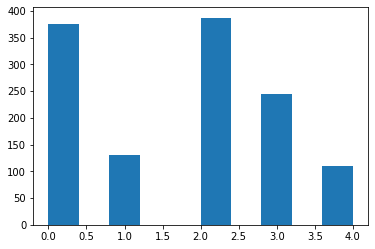

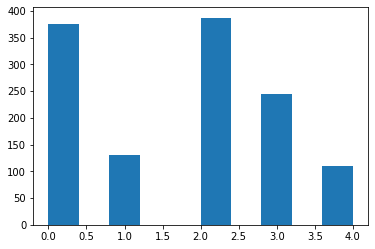

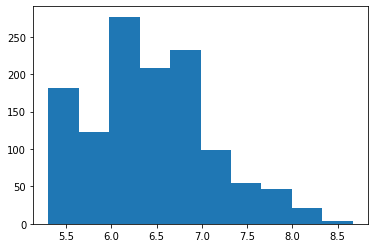

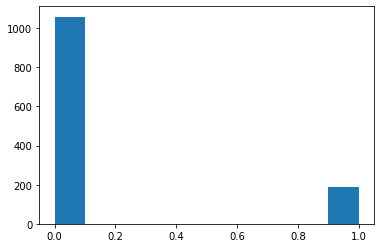

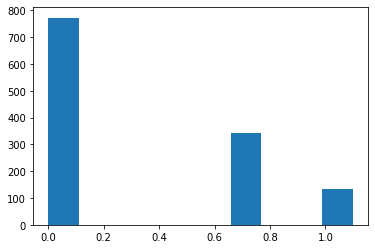

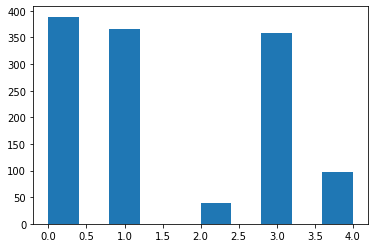

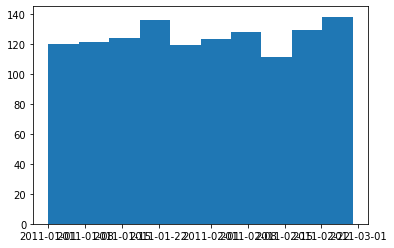

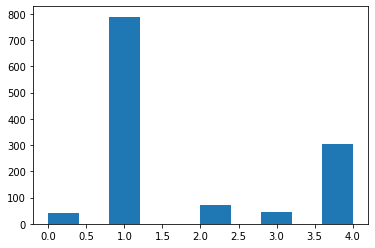

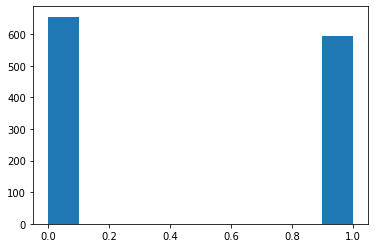

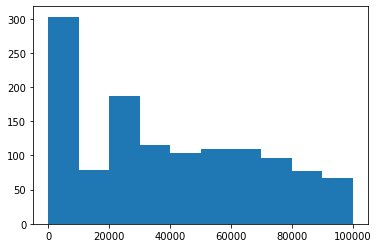

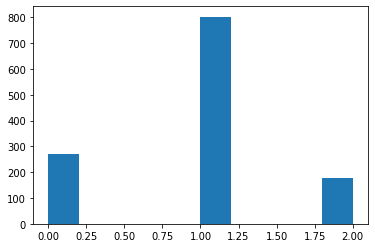

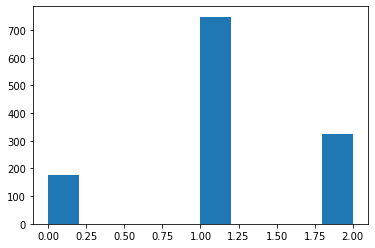

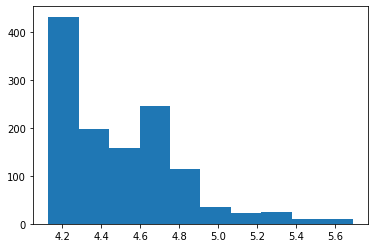

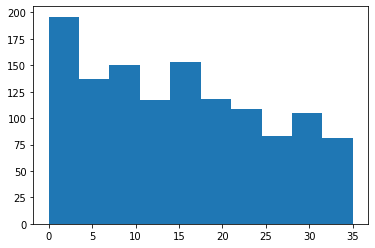

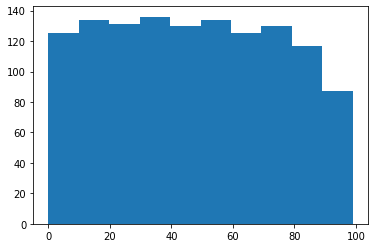

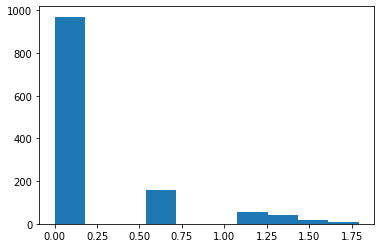

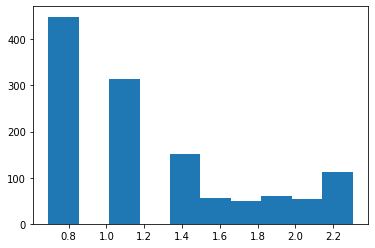

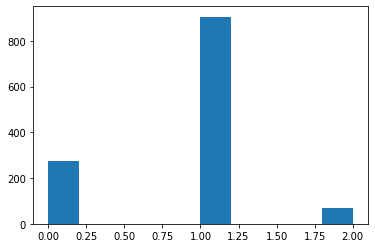

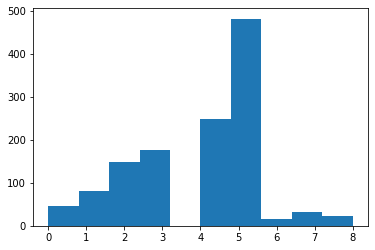

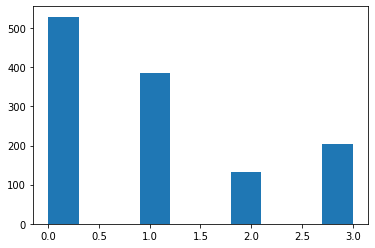

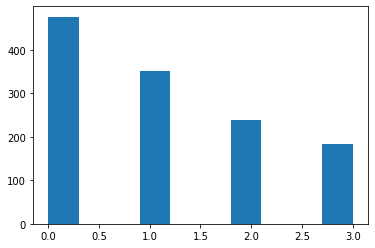

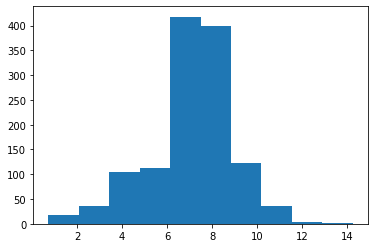

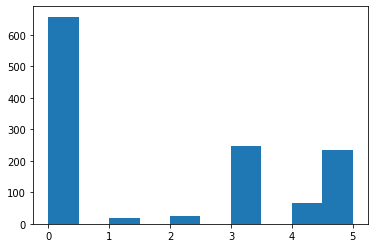

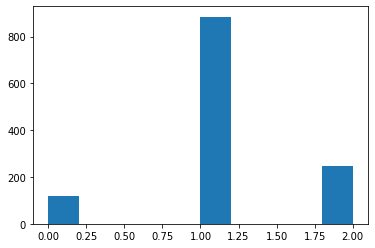

In [39]:
for i in df.columns:
    plt.figure()
    plt.hist(df[i])

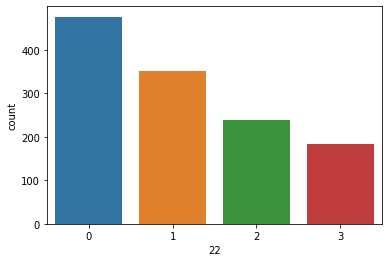

In [40]:
sns.countplot(df[22])   #count of Claim Reason

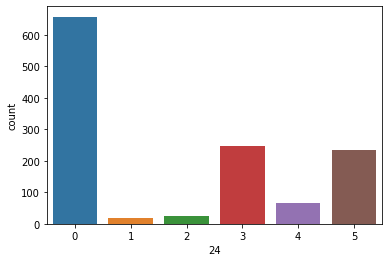

In [41]:
sns.countplot(df[24])      #count of Vehicle class

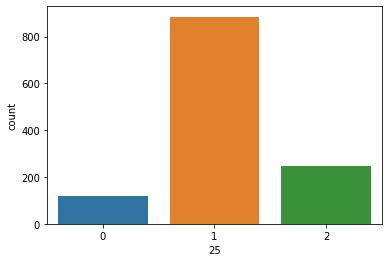

In [42]:
sns.countplot(df[25])       #count of Vehicle Size

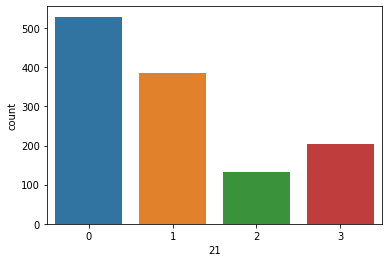

In [43]:
sns.countplot(df[21])   #count of policy

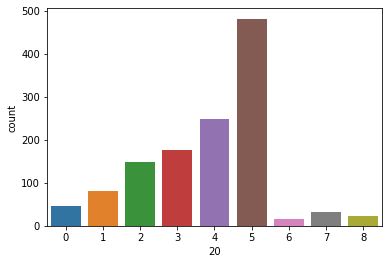

In [44]:
sns.countplot(df[20])  # count of policy type

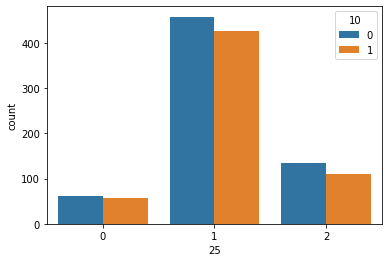

In [45]:
sns.countplot(df[25],hue=df[10])                       #vechicle size on the basis of gender

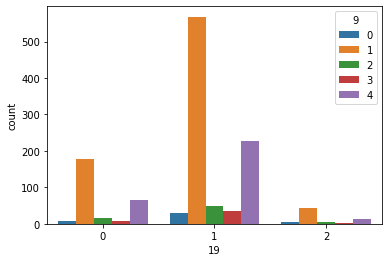

In [46]:
sns.countplot(df[19],hue=df[9])               #policy type on the basis of employment

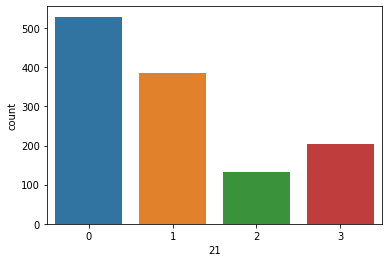

In [47]:
sns.countplot(df[21])  #Claim Reason

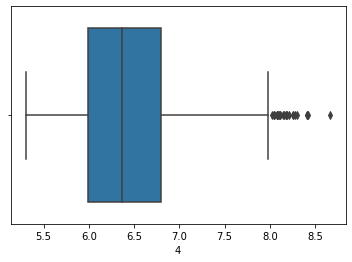

In [48]:
sns.boxplot(df[4])         #claim amount

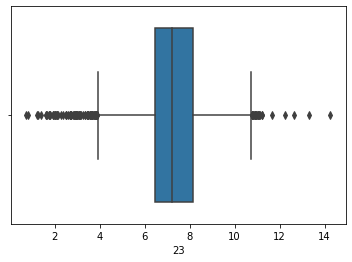

In [49]:
sns.boxplot(df[23])    #outliers in target values

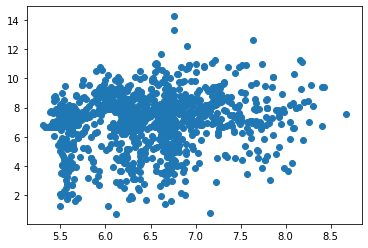

In [50]:
plt.scatter(df[4],df[23])

In [51]:
#removing outliers

In [52]:
from scipy.stats import zscore

In [53]:
z=np.abs(zscore(x))  

In [54]:
threshold=3
print(np.where(z>3))

(array([  31,   50,   51,   79,   86,  125,  181,  185,  196,  232,  243,
        244,  248,  266,  274,  281,  292,  303,  315,  316,  373,  375,
        385,  386,  403,  404,  404,  407,  408,  425,  425,  444,  496,
        510,  512,  522,  541,  554,  581,  626,  633,  645,  680,  681,
        698,  702,  727,  749,  755,  757,  814,  820,  832,  832,  836,
        840,  856,  869,  873,  888,  899,  914,  926,  949, 1002, 1011,
       1014, 1058, 1071, 1078, 1078, 1109, 1113, 1120, 1133, 1158, 1174,
       1179, 1184, 1200, 1212, 1233, 1240], dtype=int64), array([11,  2,  2,  2, 14,  2, 11, 14, 11,  2, 14, 14, 11,  2, 14, 14, 11,
        2,  2, 14,  2,  2,  2, 14, 14,  2, 11,  2,  2,  2, 11, 14, 11, 11,
        2, 11,  2, 14, 11,  2, 11, 14, 14,  2,  2, 14, 14, 14, 11, 11, 14,
        2,  2, 11,  2, 11,  2, 14, 14, 11, 14,  2, 11, 14,  2, 11,  2, 11,
       11,  2, 11, 11, 14,  2, 11, 11,  2, 14,  2, 11, 14,  2, 11],
      dtype=int64))


In [55]:
x_new=df[(z<3).all(axis=1)]

In [56]:
x_new.shape

(1170, 24)

In [57]:
#now we will use the dimensionality reduction technique to reduce the dimension from 23 columns to 9 coulumns

In [58]:
from sklearn.decomposition import PCA

In [59]:
pca=PCA(n_components=9)

In [60]:
x=pca.fit_transform(x)
x=pd.DataFrame(data=x)

In [61]:
x.head()

,0,1,2,3,4,5,6,7,8
0,17940.291078,-537.328000,-22.420730,38.163731,16.726337,-1.895090,3.793677,-0.689098,-2.138003
1,-38333.246673,-57.599405,0.777438,4.995995,-2.054414,4.590399,-2.406193,0.987538,0.958856
2,10434.333234,483.372327,2.843617,11.024156,3.233661,-0.671162,2.080894,3.759625,0.424894
3,-38333.177974,9.281835,16.273053,-15.035854,3.023448,4.133996,0.727101,-0.023833,-3.049346
4,5502.303440,-519.434052,-10.492189,0.582689,-3.100561,-2.133693,-1.225735,-1.482437,-0.750380


In [62]:
#now we will use scaling technique to standardize the dataset

In [63]:
from sklearn.preprocessing import StandardScaler

In [64]:
std=StandardScaler()

In [65]:
x=std.fit_transform(x)
x=pd.DataFrame(data=x)

In [66]:
x.head()

,0,1,2,3,4,5,6,7,8
0,0.591478,-0.817038,-0.693237,1.376381,1.667441,-0.785726,1.898179,-0.370441,-1.257401
1,-1.263818,-0.087583,0.024038,0.180181,-0.204804,1.903233,-1.203947,0.530874,0.563922
2,0.344012,0.734996,0.087923,0.397588,0.322362,-0.278271,1.041182,2.021075,0.249888
3,-1.263815,0.014114,0.503154,-0.542271,0.301406,1.714003,0.363808,-0.012812,-1.793380
4,0.181407,-0.789829,-0.324413,0.021015,-0.309094,-0.884654,-0.613301,-0.796919,-0.441313


<Figure size 432x288 with 0 Axes>

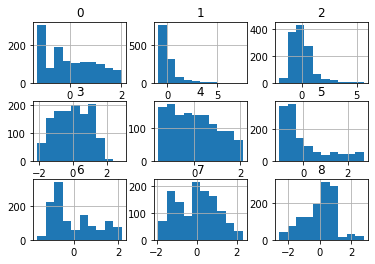

<Figure size 432x288 with 0 Axes>

In [67]:
x.hist()
plt.figure()

In [68]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1249 entries, 0 to 1248
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1249 non-null   float64
 1   1       1249 non-null   float64
 2   2       1249 non-null   float64
 3   3       1249 non-null   float64
 4   4       1249 non-null   float64
 5   5       1249 non-null   float64
 6   6       1249 non-null   float64
 7   7       1249 non-null   float64
 8   8       1249 non-null   float64
dtypes: float64(9)
memory usage: 87.9 KB


In [69]:
#now with the help of linear regression we will build our model and check the accuracy

In [70]:
#importing all required libraries

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [72]:
max_r2_scr=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.30)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    r2_scr=r2_score(y_test,pred)
    print("the r2 score corrosponding to the random state",r_state,"is:",r2_scr)
    if r2_scr>max_r2_scr:
        max_r2_scr=r2_scr
        final_r_state=r_state

print()
print()
print("maximum r2 score for the random state",final_r_state,"is:",max_r2_scr)

the r2 score corrosponding to the random state 42 is: 0.32910850095676436
the r2 score corrosponding to the random state 43 is: 0.3658450658706873
the r2 score corrosponding to the random state 44 is: 0.31725079219234553
the r2 score corrosponding to the random state 45 is: 0.3211684153130647
the r2 score corrosponding to the random state 46 is: 0.29335401361591185
the r2 score corrosponding to the random state 47 is: 0.3361116244177582
the r2 score corrosponding to the random state 48 is: 0.23670704620272287
the r2 score corrosponding to the random state 49 is: 0.29402589081223673
the r2 score corrosponding to the random state 50 is: 0.3016338509766612
the r2 score corrosponding to the random state 51 is: 0.2669400241625768
the r2 score corrosponding to the random state 52 is: 0.3154177582400063
the r2 score corrosponding to the random state 53 is: 0.3523639415884524
the r2 score corrosponding to the random state 54 is: 0.3878815450390227
the r2 score corrosponding to the random state

In [73]:
#from the above we can infer that we are getting the maximum accuracy of 40% at a random state of 87

In [74]:
lr.coef_

array([[-6.27552700e-01,  2.74045423e-01,  7.92644390e-01,
         1.07371772e-01,  4.63710001e-02,  5.34147143e-04,
         1.00072064e-02,  9.60737245e-02,  4.36264636e-03]])

In [75]:
lr.intercept_

array([7.0770015])

In [76]:
from sklearn.linear_model import Lasso,Ridge

In [77]:
ls=Lasso()

In [78]:
rd=Ridge()

In [79]:
#using grid search cv to find the best alpha value

In [80]:
from sklearn.model_selection import GridSearchCV

In [81]:
param={'alpha':[0.001,0.01,0.1,1]}

In [82]:
gd=GridSearchCV(ls,param_grid=param)

In [83]:
gd.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [84]:
gd.best_estimator_

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [85]:
gd.best_params_

{'alpha': 0.01}

In [86]:
gd.best_score_

0.3101581703480944

In [87]:
gd1=GridSearchCV(rd,param_grid=param)

In [88]:
gd1.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [89]:
gd1.best_estimator_

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [90]:
gd1.best_params_

{'alpha': 1}

In [91]:
gd1.best_score_

0.3077252004414617

In [92]:
#using cross valid score to check the best result

In [93]:
from sklearn.model_selection import cross_val_score

In [94]:
score=cross_val_score(lr,x,y,cv=5)

In [95]:
score

array([0.18548725, 0.35623153, 0.33615773, 0.41135496, 0.30564099])

In [96]:
#using regularisation and cross vaild score we are not able to get a good score hence will go for other models

In [97]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [98]:
model=[KNeighborsRegressor(),SVR(),DecisionTreeRegressor()]

In [99]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=87,test_size=0.20)
for i in model:
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print(i,"score",r2_score(y_test,pred))
    print(i,"abs error",mean_absolute_error(y_test,pred))
    print(i,"sq error",mean_squared_error(y_test,pred))

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform') score 0.24617192855827952
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform') abs error 1.2552488784859905
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform') sq error 2.7710948535660838
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) score 0.3245405100293681
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) abs error 1.0711171595565574
SVR(C=1.0, ca

In [100]:
#from the above we can infer that SVR is giving the better result amongst others

In [101]:
#finding the best parameter for svr using gridsearch cv 

In [102]:
attr={'kernel':('rbf','linear','poly'),'C':[0,1,10]}

In [103]:
gd3=GridSearchCV(estimator=SVR(),param_grid=attr)

In [104]:
gd3.fit(x,y)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0, 1, 10], 'kernel': ('rbf', 'linear', 'poly')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [105]:
gd3.best_estimator_

SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [106]:
gd3.best_params_

{'C': 1, 'kernel': 'rbf'}

In [107]:
gd3.best_score_

0.2629315688648882

In [108]:
for i in range(1,21):
    knn=KNeighborsRegressor(n_neighbors=i)
    knn.fit(x_train,y_train)
    predknn=knn.predict(x_test)
    print("accuracy score at n_neighbor",i,"is:",r2_score(y_test,predknn))

accuracy score at n_neighbor 1 is: 0.12041916188269675
accuracy score at n_neighbor 2 is: 0.14314080084626124
accuracy score at n_neighbor 3 is: 0.17730724867691205
accuracy score at n_neighbor 4 is: 0.20960170428500113
accuracy score at n_neighbor 5 is: 0.24617192855827952
accuracy score at n_neighbor 6 is: 0.27881505605854806
accuracy score at n_neighbor 7 is: 0.2923735334031955
accuracy score at n_neighbor 8 is: 0.29239801184656833
accuracy score at n_neighbor 9 is: 0.29998460892210665
accuracy score at n_neighbor 10 is: 0.2992286525257841
accuracy score at n_neighbor 11 is: 0.29111867083038145
accuracy score at n_neighbor 12 is: 0.2990441012286026
accuracy score at n_neighbor 13 is: 0.31389375480625437
accuracy score at n_neighbor 14 is: 0.3274857404734889
accuracy score at n_neighbor 15 is: 0.3282023144514401
accuracy score at n_neighbor 16 is: 0.3223560229085165
accuracy score at n_neighbor 17 is: 0.32279494303691225
accuracy score at n_neighbor 18 is: 0.31828741177515185
accurac

In [109]:
#knn is giving max score with 15 nearest neighbor 

In [110]:
# now we will try to boost the result using ensembling technique

In [111]:
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor,GradientBoostingRegressor

In [112]:
model=[KNeighborsRegressor(),SVR(),DecisionTreeRegressor()]

In [113]:
for i in model:
    a=AdaBoostRegressor(base_estimator=i,n_estimators=150,learning_rate=0.01)
    a.fit(x_train,y_train)
    predad=a.predict(x_test)
    print("r2 score for model",i,"is:",r2_score(y_test,predad))

r2 score for model KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform') is: 0.24011766797806822
r2 score for model SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) is: 0.3708869894212773
r2 score for model DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best') is: 0.3499113344967656


In [114]:
l=[0.1,0.01,1.0]
for i in l:
    gd=GradientBoostingRegressor(learning_rate=i)
    gd.fit(x_train,y_train)
    predgd=gd.predict(x_test)
    print("r2 score at lerning rate",i,"is:",r2_score(y_test,predgd))

r2 score at lerning rate 0.1 is: 0.42308456118078175
r2 score at lerning rate 0.01 is: 0.34441274903952346
r2 score at lerning rate 1.0 is: -0.013726945113137434


In [115]:
a=[150,200,250,300,350]
for i in a:
    rd=RandomForestRegressor(n_estimators=i)
    rd.fit(x_train,y_train)
    predrd=rd.predict(x_test)
    print('r2 score at',i,'is:',r2_score(y_test,predrd))

r2 score at 150 is: 0.4201918142321692
r2 score at 200 is: 0.41337570739193974
r2 score at 250 is: 0.41998780930281265
r2 score at 300 is: 0.41727603905444366
r2 score at 350 is: 0.4231852706445326


From the above implementations what we have observed is, we are unable to achieve a good accuracy score with any of the above models, so finally we will choose the best from the above implemenatations and therefore will use GradientBoostRegressor as our final model.

In [116]:
#so finalizing the model for the prediction

In [117]:
gd=GradientBoostingRegressor(learning_rate=0.1)
gd.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [118]:
gd.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [124]:
predgd=gd.predict(x_test)
df=pd.DataFrame(data=predad)
df.to_csv('auto_pred.csv')        #saving the predicted result in csv form

In [125]:
print("r2 score for GradientBoostRegressor is",r2_score(y_test,predgd))

r2 score for GradientBoostRegressor is 0.4258177542625343


In [126]:
mean_absolute_error(y_test,predgd)

1.0895900999280093

In [127]:
mean_squared_error(y_test,predgd)

2.1107113497764174

In [121]:
#dumping this model using serialization

In [122]:
from sklearn.externals import joblib

In [123]:
joblib.dump(gd,'auto_insurance_gdboost.obj')

['auto_insurance_gdboost.obj']